# Análisis de contratación pública en el Ministerio de ambiente y desarrollo sostenible de Colombia

### Elaborado por Daniela Palencia y Juan David Moreno

### Universidad Externado de Colombia

### Seminario de Programación

## Introducción 

La contratación pública representa un pilar esencial en el marco de la transparencia, eficiencia y rendición de cuentas en el ejercicio de las funciones gubernamentales. En el específico contexto del Ministerio de Ambiente y Desarrollo Sostenible de Colombia, la evaluación de la contratación pública se rige como una herramienta clave para analizar la gestión de recursos y asegurar el cumplimiento de objetivos en el ámbito ambiental y de desarrollo sostenible.

Este análisis se lleva a cabo a partir de la información recopilada en la plataforma del SECOP II, que alberga los datos reportados por Colombia Compra Eficiente. La meticulosa selección de información extraída de esta base de datos busca proporcionar una visión exhaustiva de las características de la contratación efectuada por el Ministerio.

Entre la información recolipada se encuentran aspectos cruciales como el estado y los valores asociados a los contratos, así como detalles específicos como el destino del gasto, los días adicionados, el nombre del representante legal y el presupuesto general de la nación asignado. Esta amplia gama de información se presenta como una ventana detallada que permitirá evaluar en profundidad tanto los aspectos financieros como los legales asociados a la ejecución de contratos.


Objetivo General:
Evaluar de manera integral la contratación pública realizada por el Ministerio de Ambiente y Desarrollo Sostenible de Colombia, utilizando la información recopilada en la plataforma del SECOP II, con el propósito de identificar patrones, tendencias y áreas de mejora, y así fortalecer la transparencia, eficiencia y rendición de cuentas en la ejecución de sus funciones gubernamentales en el ámbito ambiental y de desarrollo sostenible.

Objetivos Específicos:

Analizar el estado actual de los contratos ejecutados por el Ministerio, evaluando su cumplimiento, vigencia y posibles impactos en el logro de los objetivos ambientales y de desarrollo sostenible.

Examinar los valores asociados a los contratos, identificando posibles desviaciones presupuestarias y proponiendo medidas correctivas para asegurar el uso eficiente de los recursos públicos.

Investigar el destino del gasto en los contratos, destacando áreas prioritarias y asegurando que los recursos se asignen de manera coherente con los objetivos estratégicos del Ministerio.

Analizar los días adicionados en los contratos, identificando posibles demoras o extensiones y proponiendo estrategias para optimizar los plazos de ejecución.

Identificar al representante legal asociado a cada contrato, evaluando su papel en la toma de decisiones y asegurando la transparencia en la designación de responsabilidades.

Examinar el presupuesto general de la nación asignado al Ministerio, garantizando su alineación con las prioridades ambientales y de desarrollo sostenible del país.

Proponer recomendaciones fundamentadas para fortalecer y optimizar los procesos de contratación del Ministerio, con el objetivo de mejorar la eficiencia, transparencia y rendición de cuentas en la gestión de recursos públicos.

En primer lugar se cargan los paquetes requeridos para el análisis:

In [1]:
#pip install matplotlib seaborn
#pip install statsmodels

In [2]:
#Librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sodapy import Socrata
import numpy as np
from scipy.stats import f_oneway


A continuación, se utiliza la biblioteca Sodapy en Python para acceder a datos abiertos en www.datos.gov.co. Inicia sesión en la plataforma, especifica el conjunto de datos deseado ("jbjy-vk9h"), y se realiza una consulta que selecciona registros con fecha de firma posterior a '2020-01-01' y NIT de la entidad igual a 830115395. Los datos se obtienen y se transforman en un DataFrame de Pandas para su análisis posterior en Python.

In [3]:
client = Socrata("www.datos.gov.co",
                 "Aorz3WwCwZXp3wMkpD09SiMLR",## Cambie token_aqui por el token recien creado
                 username="daniela02.palencia@gmail.com", ## Correo electrónico de ingreso a la plataforma de datos abiertos
                 password="Sony1836")## Contraseña de ingreso a la plataforma de datos abiertos



socrata_dataset_identifier = "jbjy-vk9h"

Query = """
select
    *
where
    fecha_de_firma >= '2020-01-01'
    and
    nit_entidad=830115395
limit
14000000
"""

contratos_2020 = client.get(socrata_dataset_identifier, content_type="json", query=Query)

secopII_2020_DF = pd.DataFrame(pd.DataFrame.from_dict(contratos_2020))
secopII_2020_DF

,nombre_entidad,nit_entidad,departamento,ciudad,localizaci_n,orden,sector,rama,entidad_centralizada,proceso_de_compra,...,recursos_de_credito,recursos_propios,codigo_entidad,codigo_proveedor,objeto_del_contrato,fecha_de_inicio_de_ejecucion,fecha_de_fin_de_ejecucion,fecha_inicio_liquidacion,fecha_fin_liquidacion,ultima_actualizacion
0,MINISTERIO DE AMBIENTE Y DESARROLLO SOSTENIBLE,830115395,Distrito Capital de Bogotá,Bogotá,"Colombia, Bogotá, Bogotá",Nacional,Ambiente y Desarrollo Sostenible,Corporación Autónoma,Centralizada,CO1.BDOS.2765800,...,0,0,700209018,716967732,Prestación de servicios profesionales a la Dir...,NaN,NaN,NaN,NaN,NaN
1,MINISTERIO DE AMBIENTE Y DESARROLLO SOSTENIBLE,830115395,Distrito Capital de Bogotá,Bogotá,"Colombia, Bogotá, Bogotá",Nacional,Ambiente y Desarrollo Sostenible,Corporación Autónoma,Centralizada,CO1.BDOS.4075407,...,0,0,700209018,702959230,Prestar los servicios profesionales a la Ofici...,NaN,NaN,NaN,NaN,NaN
2,MINISTERIO DE AMBIENTE Y DESARROLLO SOSTENIBLE,830115395,Distrito Capital de Bogotá,Bogotá,"Colombia, Bogotá, Bogotá",Nacional,Ambiente y Desarrollo Sostenible,Corporación Autónoma,Centralizada,CO1.BDOS.2182811,...,0,0,700209018,712386309,Prestación de servicios profesionales para apo...,NaN,NaN,NaN,NaN,NaN
3,MINISTERIO DE AMBIENTE Y DESARROLLO SOSTENIBLE,830115395,Distrito Capital de Bogotá,Bogotá,"Colombia, Bogotá, Bogotá",Nacional,Ambiente y Desarrollo Sostenible,Corporación Autónoma,Centralizada,CO1.BDOS.2578264,...,0,0,700209018,714443017,Prestación de servicios profesionales a la Ofi...,NaN,NaN,NaN,NaN,NaN
4,MINISTERIO DE AMBIENTE Y DESARROLLO SOSTENIBLE,830115395,Distrito Capital de Bogotá,Bogotá,"Colombia, Bogotá, Bogotá",Nacional,Ambiente y Desarrollo Sostenible,Corporación Autónoma,Centralizada,CO1.BDOS.1529209,...,0,2517869640,700209018,703382077,"Aunar esfuerzos técnicos, administrativos y fi...",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4146,MINISTERIO DE AMBIENTE Y DESARROLLO SOSTENIBLE,830115395,Distrito Capital de Bogotá,Bogotá,"Colombia, Bogotá, Bogotá",Nacional,Ambiente y Desarrollo Sostenible,Corporación Autónoma,Centralizada,CO1.BDOS.2525299,...,0,0,700209018,708736426,Prestación de servicios profesionales a la Dir...,NaN,NaN,NaN,NaN,NaN
4147,MINISTERIO DE AMBIENTE Y DESARROLLO SOSTENIBLE,830115395,Distrito Capital de Bogotá,Bogotá,"Colombia, Bogotá, Bogotá",Nacional,Ambiente y Desarrollo Sostenible,Corporación Autónoma,Centralizada,CO1.BDOS.3855809,...,0,0,700209018,706652088,Prestar servicios profesionales en el proceso ...,NaN,NaN,NaN,NaN,NaN
4148,MINISTERIO DE AMBIENTE Y DESARROLLO SOSTENIBLE,830115395,Distrito Capital de Bogotá,Bogotá,"Colombia, Bogotá, Bogotá",Nacional,Ambiente y Desarrollo Sostenible,Corporación Autónoma,Centralizada,CO1.BDOS.4271532,...,0,0,700209018,721522266,Prestación de servicios profesionales a la Dir...,NaN,NaN,NaN,NaN,NaN
4149,MINISTERIO DE AMBIENTE Y DESARROLLO SOSTENIBLE,830115395,Distrito Capital de Bogotá,Bogotá,"Colombia, Bogotá, Bogotá",Nacional,Ambiente y Desarrollo Sostenible,Corporación Autónoma,Centralizada,CO1.BDOS.3389915,...,0,0,700209018,706637709,Prestar servicios de Apoyo a la Gestión al Gru...,NaN,NaN,NaN,NaN,NaN


Ahora se guarda el DataFrame secopII_2020_DF como un archivo CSV con el nombre "contratos2020.csv" en el directorio "../../Datos/Raw/". Además, estos datos son posteriormente leídos y cargados en un nuevo DataFrame llamado contratos_min_ambiente. Este proceso de guardado y carga proporciona una manera eficiente de preservar y trabajar con los datos obtenidos en futuras etapas de análisis o procesamiento.

In [4]:
secopII_2020_DF.to_csv('../../Datos/Raw/contratos2020.csv')
contratos_min_ambiente=pd.read_csv('../../Datos/Raw/contratos2020.csv')

Para iniciar el análisis, es fundamental obtener una comprensión detallada del contenido de la base de datos que será examinada. Esto implica la necesidad de conocer el nombre de las columnas que conforman dicha base de datos. 

In [5]:
print(contratos_min_ambiente.columns)

print("Número de columnas:", contratos_min_ambiente.shape[1])

Index(['Unnamed: 0', 'nombre_entidad', 'nit_entidad', 'departamento', 'ciudad',
       'localizaci_n', 'orden', 'sector', 'rama', 'entidad_centralizada',
       'proceso_de_compra', 'id_contrato', 'referencia_del_contrato',
       'estado_contrato', 'codigo_de_categoria_principal',
       'descripcion_del_proceso', 'tipo_de_contrato',
       'modalidad_de_contratacion', 'justificacion_modalidad_de',
       'fecha_de_firma', 'fecha_de_inicio_del_contrato',
       'fecha_de_fin_del_contrato', 'condiciones_de_entrega',
       'tipodocproveedor', 'documento_proveedor', 'proveedor_adjudicado',
       'es_grupo', 'es_pyme', 'habilita_pago_adelantado', 'liquidaci_n',
       'obligaci_n_ambiental', 'obligaciones_postconsumo', 'reversion',
       'origen_de_los_recursos', 'destino_gasto', 'valor_del_contrato',
       'valor_de_pago_adelantado', 'valor_facturado',
       'valor_pendiente_de_pago', 'valor_pagado', 'valor_amortizado',
       'valor_pendiente_de', 'valor_pendiente_de_ejecucion', 'e

Con esta información se puede observar de mejor manera que columnas son de interés provechoso para el análisis y se procede a filtrar de mejor manera la base: 

Con esta información, es posible examinar de manera más detallada qué columnas resultan ser de interés y beneficio para el análisis en curso. Este conocimiento facilita un filtrado más preciso y eficiente de la base de datos, permitiendo concentrar la atención en los atributos específicos que contribuirán de manera significativa al análisis que se está llevando a cabo.

In [6]:
#Seleccion de columnas 
Base_filtrada = pd.concat([
    contratos_min_ambiente.loc[:, 'estado_contrato':'valor_del_contrato']
], axis=1)
columnas_eliminar = ["codigo_de_categoria_principal", "descripcion_del_proceso", "condiciones_de_entrega", "documento_proveedor"]
Base_filtrada = Base_filtrada.drop(columnas_eliminar, axis=1)
Base_filtrada.to_csv('../../Datos/Raw/base_recortada_contratos.csv', index=False)
Data=pd.read_csv('../../Datos/Raw/base_recortada_contratos.csv')
Base_filtrada

,estado_contrato,tipo_de_contrato,modalidad_de_contratacion,justificacion_modalidad_de,fecha_de_firma,fecha_de_inicio_del_contrato,fecha_de_fin_del_contrato,tipodocproveedor,proveedor_adjudicado,es_grupo,es_pyme,habilita_pago_adelantado,liquidaci_n,obligaci_n_ambiental,obligaciones_postconsumo,reversion,origen_de_los_recursos,destino_gasto,valor_del_contrato
0,En ejecución,Prestación de servicios,Contratación directa,Servicios profesionales y apoyo a la gestión,2022-01-29T00:00:00.000,2022-01-28T00:00:00.000,2022-11-29T00:00:00.000,Cédula de Ciudadanía,OSCAR ANDRES MARTINEZ,No,No,No,No,No,No,No,Distribuido,Inversión,90500000
1,cedido,Prestación de servicios,Contratación directa,Servicios profesionales y apoyo a la gestión,2023-03-01T00:00:00.000,2023-03-03T00:00:00.000,2023-12-28T00:00:00.000,Cédula de Ciudadanía,Juañ David Martinez Morales,No,No,No,No,No,No,No,Distribuido,Inversión,77946667
2,En ejecución,Prestación de servicios,Contratación directa,Servicios profesionales y apoyo a la gestión,2021-08-19T00:00:00.000,2021-08-20T00:00:00.000,2021-12-30T00:00:00.000,Cédula de Ciudadanía,María Catalina Pinedo Tous,No,No,No,No,No,No,No,Distribuido,Inversión,22533290
3,En ejecución,Prestación de servicios,Contratación directa,Servicios profesionales y apoyo a la gestión,2022-01-17T00:00:00.000,2022-01-19T00:00:00.000,2022-10-19T00:00:00.000,Cédula de Ciudadanía,Maira Alejandra Pérez Mojica,No,No,No,No,No,No,No,Distribuido,Inversión,49168080
4,Modificado,Otro,Contratación directa,Contratos o convenios Interadministrativos (va...,2020-11-01T00:00:00.000,2020-11-03T00:00:00.000,2023-01-01T00:00:00.000,No Definido,PROGRAMA DE LAS NACIONES UNIDAS PARA EL DESARR...,No,No,No,No,No,No,No,Distribuido,Inversión,4817869640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4146,En ejecución,Prestación de servicios,Contratación directa,Servicios profesionales y apoyo a la gestión,2022-01-13T00:00:00.000,2022-01-14T00:00:00.000,2022-12-15T00:00:00.000,Cédula de Ciudadanía,Yina Marcela Carrera Rodríguez,No,No,No,No,No,No,No,Distribuido,Inversión,110000000
4147,En ejecución,Prestación de servicios,Contratación directa,Servicios profesionales y apoyo a la gestión,2023-01-28T00:00:00.000,2023-02-02T00:00:00.000,2023-06-01T00:00:00.000,Cédula de Ciudadanía,DIEGO MAURICIO SARMIENTO-PEREZ TOLEDO,No,No,No,No,No,No,No,Distribuido,Inversión,23500000
4148,En ejecución,Prestación de servicios,Contratación directa,Servicios profesionales y apoyo a la gestión,2023-04-11T00:00:00.000,2023-04-12T00:00:00.000,2023-12-27T00:00:00.000,Cédula de Ciudadanía,David Eduardo Monroy Ramos,No,No,No,No,No,No,No,Distribuido,Inversión,53125000
4149,Modificado,Prestación de servicios,Contratación directa,Servicios profesionales y apoyo a la gestión,2022-10-18T00:00:00.000,2022-10-20T00:00:00.000,2022-12-31T00:00:00.000,Cédula de Ciudadanía,Michael Andrés Gacha Cortés,No,No,No,No,No,No,No,Distribuido,Inversión,11336333


In [7]:
print(Base_filtrada.columns)

Index(['estado_contrato', 'tipo_de_contrato', 'modalidad_de_contratacion',
       'justificacion_modalidad_de', 'fecha_de_firma',
       'fecha_de_inicio_del_contrato', 'fecha_de_fin_del_contrato',
       'tipodocproveedor', 'proveedor_adjudicado', 'es_grupo', 'es_pyme',
       'habilita_pago_adelantado', 'liquidaci_n', 'obligaci_n_ambiental',
       'obligaciones_postconsumo', 'reversion', 'origen_de_los_recursos',
       'destino_gasto', 'valor_del_contrato'],
      dtype='object')


Se identifica el tamaño de la nueva base de datos y si hay datos faltantes: 

In [8]:
filas, columnas = Base_filtrada.shape

# Para conocer el numero de filas y columnas de la base filtrada
print(f'Número de filas: {filas}')
print(f'Número de columnas: {columnas}')

Número de filas: 4151
Número de columnas: 19


In [9]:
# Se configura la visualización para mostrar todas las columnas
pd.set_option('display.max.columns', None)
nan_count = Base_filtrada.isna().sum()

print("Número de NaN por columna:")
print(nan_count)

Número de NaN por columna:
estado_contrato                  0
tipo_de_contrato                 0
modalidad_de_contratacion        0
justificacion_modalidad_de       0
fecha_de_firma                   0
fecha_de_inicio_del_contrato    97
fecha_de_fin_del_contrato        0
tipodocproveedor                 0
proveedor_adjudicado             0
es_grupo                         0
es_pyme                          0
habilita_pago_adelantado         0
liquidaci_n                      0
obligaci_n_ambiental             0
obligaciones_postconsumo         0
reversion                        0
origen_de_los_recursos           0
destino_gasto                    0
valor_del_contrato               0
dtype: int64


De lo anterior se destaca que, de las columnas seleccionadas para el análisis, únicamente la columna que almacena información sobre la Fecha de Inicio del Contrato presenta tres valores faltantes, los cuales equivalen al 0.07% de todas las filas, por lo que se eliminaran estas observaciones de la base de datos para tener una base completa. A continuación, se procederá a elaborar el análisis correspondiente a las columnas seleccionadas de interés y se implementarán estrategias adecuadas para abordar la gestión de los valores faltantes en la mencionada columna. 

In [10]:
Base_filtrada = Base_filtrada.dropna()

In [11]:
valores_nulos = Base_filtrada.isna()
hay_Na = valores_nulos.any().any()
print("Hay valores nulos en la base de datos?", hay_Na)

Hay valores nulos en la base de datos? False


Dado que ya no hay valores nulos se seguirá con el análisis de los datos.

Estado de Contrato:
                 Frecuencia  Porcentaje
estado_contrato                        
En ejecución           1897       46.79
Modificado             1546       38.14
terminado               277        6.83
Cerrado                 151        3.72
Activo                  146        3.60
cedido                   37        0.91


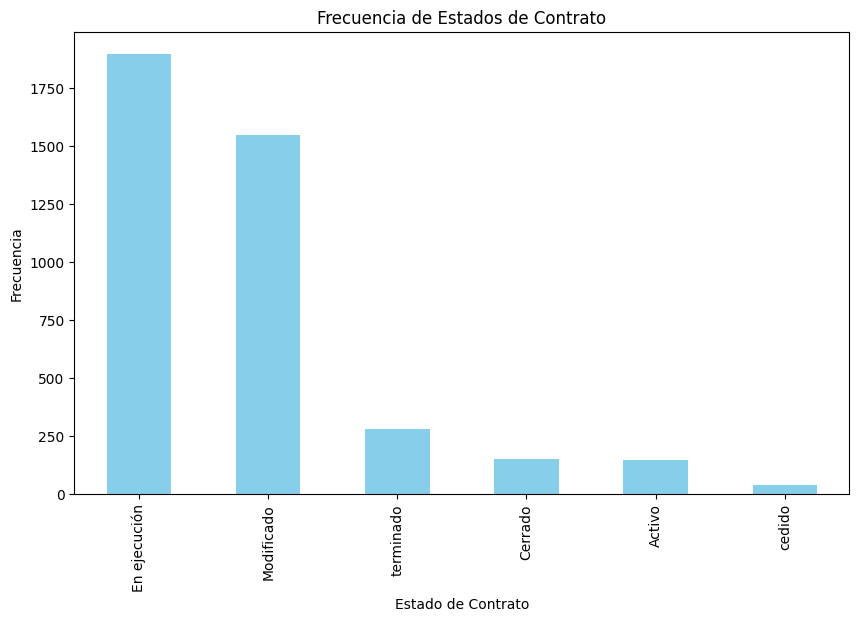


Número de tipos de contrato: 10

Frecuencia de cada tipo de contrato:
tipo_de_contrato
Prestación de servicios    3889
Otro                        110
Suministros                  14
Compraventa                  12
No Especificado              11
Decreto 092 de 2017           5
Seguros                       5
Consultoría                   4
Obra                          3
Negocio fiduciario            1
Name: count, dtype: int64

Número de modalidades de contratación: 10

Frecuencia de cada modalidad de contratación:
modalidad_de_contratacion
Contratación directa                                           3940
Mínima cuantía                                                   46
Selección abreviada subasta inversa                              23
Selección Abreviada de Menor Cuantía                             16
Contratación régimen especial                                    16
Licitación pública                                                7
Contratación régimen especial (con ofertas

In [12]:
estado_contrato_data = Base_filtrada['estado_contrato'].value_counts()
estado_contrato_porcentajes = Base_filtrada['estado_contrato'].value_counts(normalize=True) * 100
estado_contrato_porcentajes = estado_contrato_porcentajes.round(2)
estado_contrato_df = pd.DataFrame({'Frecuencia': estado_contrato_data, 'Porcentaje': estado_contrato_porcentajes})

print("Estado de Contrato:")
print(estado_contrato_df)

estado_contrato_data.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Frecuencia de Estados de Contrato')
plt.xlabel('Estado de Contrato')
plt.ylabel('Frecuencia')
plt.show()

tipos_contrato_frecuencias = Base_filtrada['tipo_de_contrato'].value_counts()
print(f"\nNúmero de tipos de contrato: {len(tipos_contrato_frecuencias)}")
print("\nFrecuencia de cada tipo de contrato:")
print(tipos_contrato_frecuencias)

modalidades_contratacion_frecuencias = Base_filtrada['modalidad_de_contratacion'].value_counts()
print(f"\nNúmero de modalidades de contratación: {len(modalidades_contratacion_frecuencias)}")
print("\nFrecuencia de cada modalidad de contratación:")
print(modalidades_contratacion_frecuencias)


El análisis unificado de las frecuencias de estados de contrato, tipos de contrato y modalidades de contratación proporciona una visión comprehensiva de las prácticas de contratación en el Ministerio de Ambiente y Desarrollo Sostenible. A continuación, se presentan los resultados clave:

Estado de Contrato:
La frecuencia de cada estado de contrato proporciona una visión clara de cómo se distribuyen los contratos en diferentes etapas de ejecución. La abrumadora prevalencia de "Contratación directa" con 3746 contratos sugiere una estrategia dominante de abordar procesos contractuales de manera directa, posiblemente para agilizar y simplificar la ejecución. Aunque otras categorías como "Mínima cuantía" y "Selección abreviada subasta inversa" tienen frecuencias más bajas, su presencia indica la aplicación de diferentes enfoques en situaciones específicas.

Tipos de Contrato:
La identificación de la "Prestación de servicios" como el tipo de contrato más frecuente, con 3707 contratos, resalta la importancia de esta actividad en los proyectos del Ministerio. Las otras categorías de tipos de contrato, aunque menos frecuentes, pueden tener implicaciones particulares y requerir consideraciones específicas en términos de gestión y ejecución.

Modalidades de Contratación:
La preeminencia de la "Contratación directa" con 3746 contratos indica una preferencia por este enfoque, posiblemente motivada por la flexibilidad que ofrece. Aunque modalidades como "Mínima cuantía" y "Selección abreviada subasta inversa" tienen frecuencias más bajas, su presencia sugiere una variedad de enfoques para abordar diferentes tipos de proyectos. La diversificación en modalidades especiales, como "Concurso de méritos abierto" y "Seleccion Abreviada Menor Cuantia Sin Manifestacion Interes", destaca la adaptabilidad en la elección de métodos, indicando una respuesta específica a la complejidad y naturaleza única de ciertos proyectos. .

Frecuencias de todas las justificaciones de modalidad de contratación:
justificacion_modalidad_de
Servicios profesionales y apoyo a la gestión                                                  3888
Contratos o convenios Interadministrativos (valor cero)                                        100
Presupuesto inferior al 10% de la menor cuantía                                                 46
No existe pluralidad de oferentes en el mercado                                                 26
Suministro de bienes y servicios de características técnicas uniformes y común utilización      23
No Definido                                                                                     17
Regla aplicable                                                                                 13
Presupuesto menor al 10% de la Menor Cuantía                                                    12
Ley 1150 de 2007                                                                                10
Decreto 092

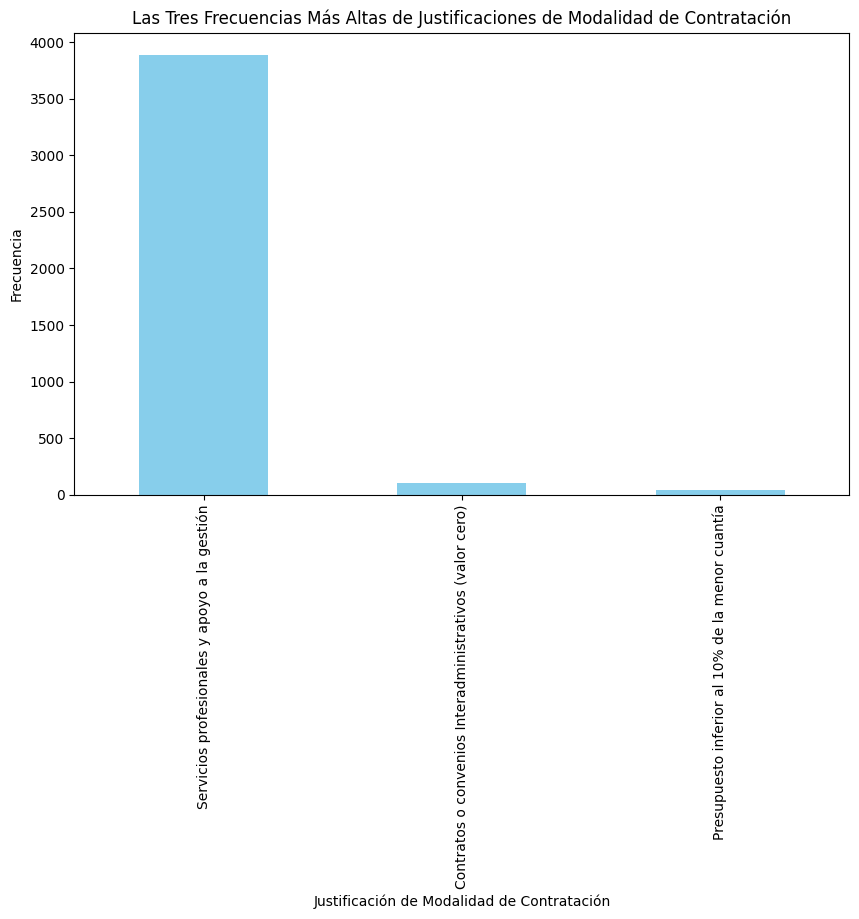

In [13]:
justificaciones_modalidad_frecuencias = contratos_min_ambiente['justificacion_modalidad_de'].value_counts()
print("Frecuencias de todas las justificaciones de modalidad de contratación:")
print(justificaciones_modalidad_frecuencias)

top_justificaciones = justificaciones_modalidad_frecuencias.head(3)

plt.figure(figsize=(10, 6))
top_justificaciones.plot(kind='bar', color='skyblue')
plt.title('Las Tres Frecuencias Más Altas de Justificaciones de Modalidad de Contratación')
plt.xlabel('Justificación de Modalidad de Contratación')
plt.ylabel('Frecuencia')
plt.show()


El análisis de las justificaciones de modalidad de contratación proporciona una visión detallada de las razones detrás de la elección de ciertos métodos de contratación en el Ministerio de Ambiente y Desarrollo Sostenible. Destacan tres categorías con las frecuencias más altas:

Servicios Profesionales y Apoyo a la Gestión (3615 contratos):

Esta justificación lidera con una frecuencia considerable, indicando que el Ministerio frecuentemente recurre a servicios profesionales y apoyo a la gestión en sus contratos. Esto podría reflejar la necesidad de experiencia especializada para llevar a cabo proyectos y tareas específicas.
Contratos o Convenios Interadministrativos (Valor Cero) (100 contratos):

La justificación de contratos o convenios interadministrativos con valor cero tiene una frecuencia significativa, señalando la existencia de acuerdos colaborativos entre diferentes entidades gubernamentales. Esta práctica puede ser común para compartir recursos o conocimientos sin intercambio financiero directo.
Presupuesto Inferior al 10% de la Menor Cuantía (46 contratos):

La selección de esta modalidad debido a un presupuesto inferior al 10% de la menor cuantía es otra justificación utilizada con regularidad. Esto puede indicar una preferencia por este enfoque en situaciones donde el presupuesto disponible es relativamente bajo en comparación con la menor cuantía establecida.
Las restantes justificaciones, aunque menos frecuentes, incluyen razones como la falta de pluralidad de oferentes en el mercado, cumplimiento de normativas específicas (como la Ley 1150 de 2007 o el Decreto 092 de 2017), urgencia manifiesta, entre otras. 

C:\Users\Usuario\AppData\Local\Temp\ipykernel_12464\953946201.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Base_filtrada['fecha_de_firma'] = pd.to_datetime(Base_filtrada['fecha_de_firma'])
C:\Users\Usuario\AppData\Local\Temp\ipykernel_12464\953946201.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Base_filtrada['fecha_de_inicio_del_contrato'] = pd.to_datetime(Base_filtrada['fecha_de_inicio_del_contrato'])
C:\Users\Usuario\AppData\Local\Temp\ipykernel_12464\953946201.py:3: SettingWithCopyWarning: 

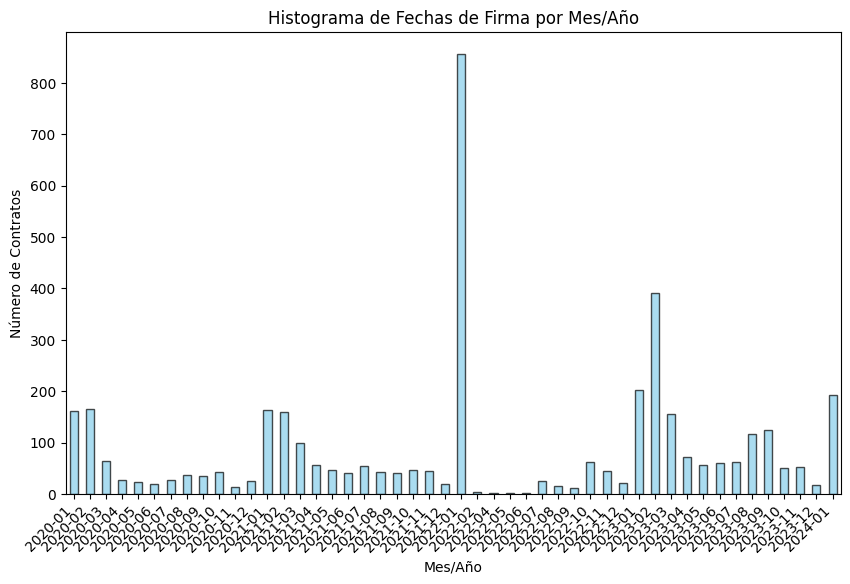

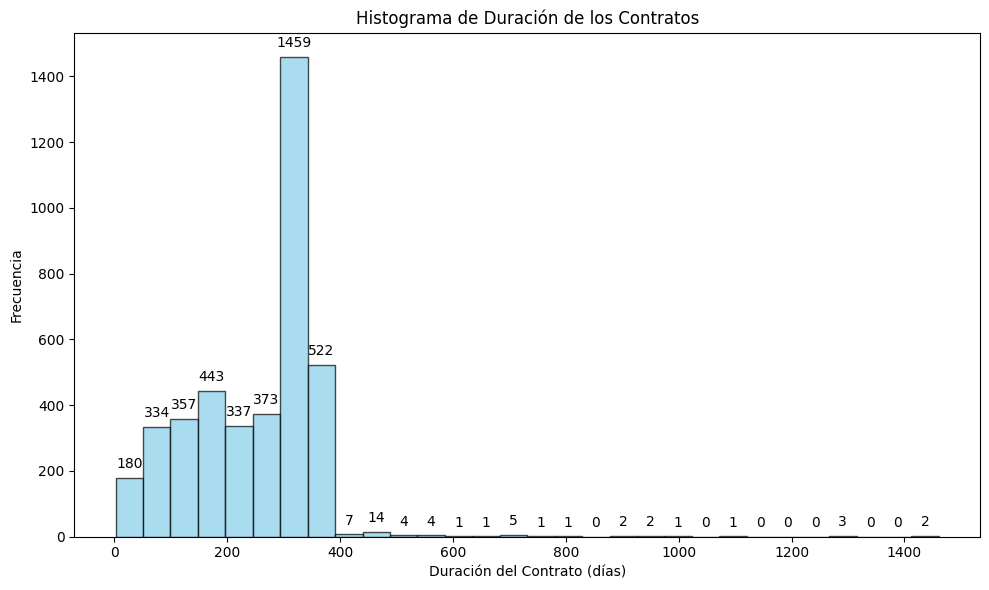

In [14]:

Base_filtrada['fecha_de_firma'] = pd.to_datetime(Base_filtrada['fecha_de_firma'])
Base_filtrada['fecha_de_inicio_del_contrato'] = pd.to_datetime(Base_filtrada['fecha_de_inicio_del_contrato'])
Base_filtrada['fecha_de_fin_del_contrato'] = pd.to_datetime(Base_filtrada['fecha_de_fin_del_contrato'])

Base_filtrada['mes_anio'] = Base_filtrada['fecha_de_firma'].dt.to_period("M")
Base_filtrada['duracion_del_contrato'] = (Base_filtrada['fecha_de_fin_del_contrato'] - Base_filtrada['fecha_de_inicio_del_contrato']).dt.days

# Se crea un histograma con las fechas de firma por mes/año
Base_filtrada['mes_anio'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black', alpha=0.7, figsize=(10, 6))
plt.title('Histograma de Fechas de Firma por Mes/Año')
plt.xlabel('Mes/Año')
plt.ylabel('Número de Contratos')
plt.xticks(rotation=45, ha='right')

# Se crea un histograma de duración de los contratos con frecuencia encima de las barras
plt.figure(figsize=(10, 6))
ax = plt.subplot(1, 1, 1)
Base_filtrada['duracion_del_contrato'].hist(bins=30, color='skyblue', edgecolor='black', alpha=0.7, ax=ax, grid=False)
plt.title('Histograma de Duración de los Contratos')
plt.xlabel('Duración del Contrato (días)')
plt.ylabel('Frecuencia')

for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()


Las gráficas revelan patrones notables en la firma de contratos durante el periodo de 2020 a 2023. Se destaca que los dos primeros meses de cada año concentran el mayor número de contratos. En enero y febrero de 2020 se firmaron alrededor de 180 contratos cada mes, manteniéndose una cifra similar en 2021. Sin embargo, en enero de 2022 se experimentó un notable incremento, superando los 800 contratos. En contraste, para 2023, la cantidad de contratos firmados en el primer mes del año se redujo casi a la mitad.

Esta variación en la cantidad de contratos podría vincularse con las estrategias gubernamentales de reactivación económica implementadas a principios de 2022, tras dos años de pandemia que posiblemente ralentizaron la contratación pública. Se observa que los meses con menor actividad contractual son los últimos del año, con la excepción del segundo cuatrimestre de 2022, donde se evidencia una marcada disminución en la firma de contratos. Estos hallazgos sugieren una dinámica estacional y posiblemente reflejen cambios en las prioridades y enfoques del gobierno en respuesta a condiciones económicas y de salud pública cambiantes.

A partir del segundo gráfico, se puede realizar un análisis detallado del periodo evaluado (2020-2023) en la base de datos. Se destaca que se identificaron más de 1,300 contratos con una duración de 1,390 días, siendo este el periodo más extenso registrado para un contrato. Asimismo, se observa que el rango más frecuente de duración para los contratos se sitúa entre 181 y 431 días. Es notable que la duración de contratos inferiores a 50 días es bastante poco frecuente, indicando una tendencia a acuerdos de mediano a largo plazo en la contratación evaluada. 

In [15]:
frecuencias_tipodocproveedor = Base_filtrada['tipodocproveedor'].value_counts()
print("Frecuencias de contratos por tipo de documento del proveedor:")
print(frecuencias_tipodocproveedor)

Frecuencias de contratos por tipo de documento del proveedor:
tipodocproveedor
Cédula de Ciudadanía     3771
No Definido               266
Sin Descripcion             9
Cédula de Extranjería       6
Tarjeta de Identidad        2
Name: count, dtype: int64



El análisis detallado de los tipos de documento utilizados por los proveedores en los contratos del Ministerio de Ambiente y Desarrollo Sostenible revela patrones notables en la identificación de los proveedores. En primer lugar, la mayoría de los contratos están vinculados a proveedores que emplean la Cédula de Ciudadanía como documento principal, consolidándose como la opción preponderante. Además, la presencia de un número significativo de contratos con el tipo de documento no definido sugiere posibles inconsistencias o falta de información en algunas entradas.

Es particularmente intrigante observar que dos contratos están asociados a proveedores que utilizan la Tarjeta de Identidad como documento de identificación. Este hallazgo es excepcional, ya que la Tarjeta de Identidad suele ser un documento utilizado por individuos menores de edad. Este aspecto merece una investigación más profunda para comprender las circunstancias específicas que llevaron a esta situación inusual.

Asimismo, llama la atención la escasa representación de proveedores con Cédula de Extranjería, limitándose a solo seis casos. Este fenómeno podría sugerir restricciones en la participación de proveedores extranjeros en ciertos tipos de contratos o reflejar la predominancia de proveedores nacionales en las transacciones de contratación del Ministerio.

In [16]:
contratos_por_proveedor = Base_filtrada['proveedor_adjudicado'].value_counts()
proveedores_con_mas_de_dos_contratos = contratos_por_proveedor[contratos_por_proveedor > 2]
print("Proveedores con más de dos contratos adjudicados:")
print(proveedores_con_mas_de_dos_contratos)


Proveedores con más de dos contratos adjudicados:
proveedor_adjudicado
Ministerio de Ambiente y Desarrollo Sostenible                                  13
INSTITUTO DE INVESTIGACION DE RECURSOS BIOLOGICOS ALEXANDER VON HUMBOLDT        10
PROGRAMA DE LAS NACIONES UNIDAS PARA EL DESARROLLO PNUD                          9
INSTITUTO DE INVESTIGACIONES MARINAS Y COSTERAS JOSE BENITO VIVES DE ANDREIS     8
PEDRO MANUEL AVENDAÑO LAITON                                                     7
                                                                                ..
SARA MILENA ECHANDIA ALVAREZ                                                     3
Vera Tatiana Martinez Baños                                                      3
Luis Fernando Castillo Rojas                                                     3
Nancy Liseth Muñoz Ortiz                                                         3
LUIS GABRIEL MORENO SANDOVAL                                                     3
Name: count, Len

El análisis detallado de los proveedores que han sido adjudicatarios en más de dos contratos con el Ministerio de Ambiente y Desarrollo Sostenible revela una diversidad significativa en las entidades y actores involucrados en la ejecución de proyectos. En primer lugar, el propio Ministerio emerge como un adjudicatario frecuente, sugiriendo la posibilidad de contratos internos o interinstitucionales. Destacan instituciones especializadas como el INSTITUTO DE INVESTIGACION DE RECURSOS BIOLOGICOS ALEXANDER VON HUMBOLDT, evidenciando la importancia de la investigación de recursos biológicos en los proyectos ministeriales. Asimismo, la presencia del PROGRAMA DE LAS NACIONES UNIDAS PARA EL DESARROLLO PNUD indica colaboraciones internacionales en áreas relacionadas con el desarrollo sostenible y el medio ambiente. Otro actor clave es el INSTITUTO DE INVESTIGACIONES MARINAS Y COSTERAS JOSE BENITO VIVES DE ANDREIS, resaltando la relevancia de los estudios marinos y costeros en las iniciativas ministeriales. 

Además, proveedores individuales como Nicolly Daniela Sánchez Valcarcel, junto con otros como Consuelo Gauta Gómez, Jorge Eliécer Portela Paipa, Kelly Joletti Moreno Fontalvo, Laura Cristina Morales Giraldo y Kevin Alexander Alvarado Burgos, desempeñan roles importantes al ser adjudicatarios en varios contratos, sugiriendo posibles relaciones continuas y acuerdos a largo plazo. En conclusión, este análisis subraya la estrategia de colaboración diversa del Ministerio y la importancia de contar con proveedores especializados para la implementación exitosa de sus proyectos.

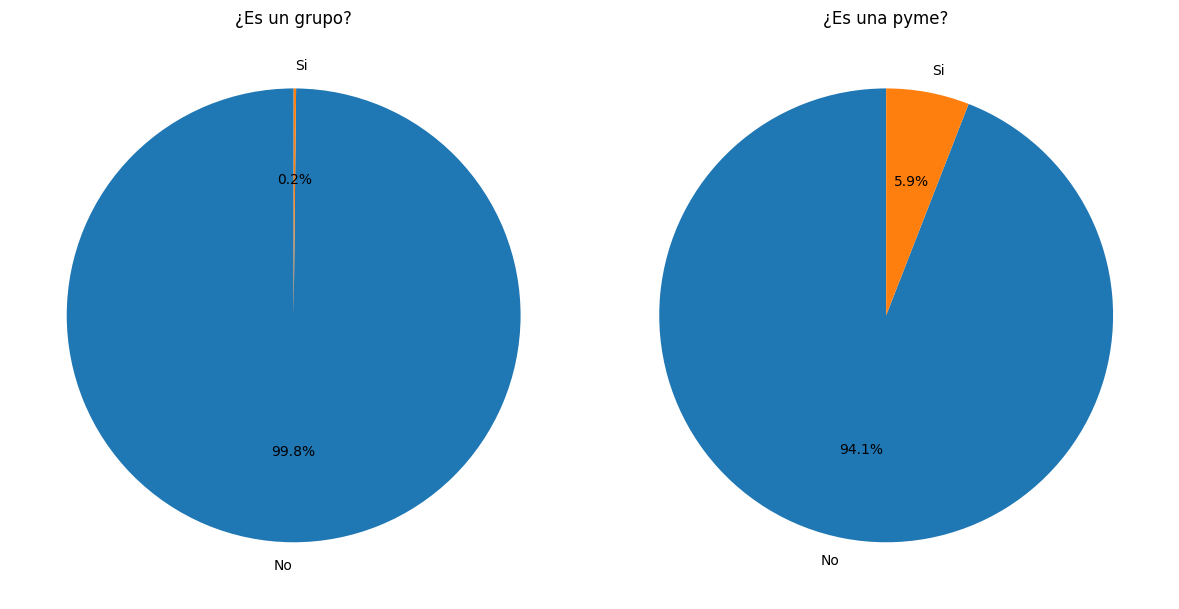

Tabla de Frecuencias:
    Es un grupo  Es una pyme
No         4047         3814
Si            7          240


In [17]:
frecuencias_grupo = Base_filtrada['es_grupo'].value_counts()
frecuencias_pyme = Base_filtrada['es_pyme'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.pie(frecuencias_grupo, labels=frecuencias_grupo.index, autopct='%1.1f%%', startangle=90)
ax1.set_title('¿Es un grupo?')

ax2.pie(frecuencias_pyme, labels=frecuencias_pyme.index, autopct='%1.1f%%', startangle=90)
ax2.set_title('¿Es una pyme?')

plt.tight_layout()
plt.show()

tabla_frecuencias = pd.DataFrame({
    'Es un grupo': frecuencias_grupo,
    'Es una pyme': frecuencias_pyme
})

print("Tabla de Frecuencias:")
print(tabla_frecuencias)

Los anteriores gráficos revelan detalles significativos sobre la distribución de los contratos en la base de datos filtrada en función de las categorías "es_grupo" y "es_pyme". En relación con la condición de ser un grupo, se destaca que la abrumadora mayoría de los contratos, específicamente 3854 de ellos, corresponden a entidades contratantes que no son consideradas grupos. En contraste, solo se identificaron 7 contratos asociados a entidades que cumplen con la condición de ser un grupo. Respecto a la condición de ser una pequeña o mediana empresa (PYME), se observa que 3626 contratos no están vinculados a PYME, mientras que 235 contratos sí se adjudicaron a este tipo de entidades.

Estos resultados sugieren que, en este conjunto de datos, las entidades individuales no consideradas como grupos son predominantes como adjudicatarias de contratos. La presencia limitada de contratos asociados a grupos indica que, en términos generales, las entidades individuales son más frecuentes en comparación con las entidades que cumplen con la condición de ser grupos. Además, la mayoría de los contratos no están vinculados a PYME, subrayando la importancia de entender la diversidad de las entidades adjudicatarias en el contexto de la contratación pública.

In [18]:
#crear la base
Base_filtrada['log_valor_contrato'] = np.log1p(Base_filtrada['valor_del_contrato'])

estadisticas_descriptivas = Base_filtrada['valor_del_contrato'].describe().to_frame().join(Base_filtrada['log_valor_contrato'].describe().to_frame(), lsuffix='_Original', rsuffix='_Logaritmo')

#titulos 
estadisticas_descriptivas.columns = ['Original', 'Logaritmo']

print(estadisticas_descriptivas)

           Original    Logaritmo
count  4.054000e+03  4054.000000
mean   1.523399e+08    17.675548
std    1.993911e+09     1.265194
min    0.000000e+00     0.000000
25%    3.000000e+07    17.216708
50%    5.373333e+07    17.799544
75%    8.082792e+07    18.207833
max    1.146352e+11    25.465021


C:\Users\Usuario\AppData\Local\Temp\ipykernel_12464\3391545066.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Base_filtrada['log_valor_contrato'] = np.log1p(Base_filtrada['valor_del_contrato'])


Se utilizó la transformación logarítmica en el gráfico del valor de los contratos con el fin de mejorar la visualización de la distribución de datos. Esta transformación es particularmente útil dado que la variable cuenta con una amplia gama de valores y tiene la presencia de valores extremos lo que afecta significativamente la interpretación en una escala lineal.

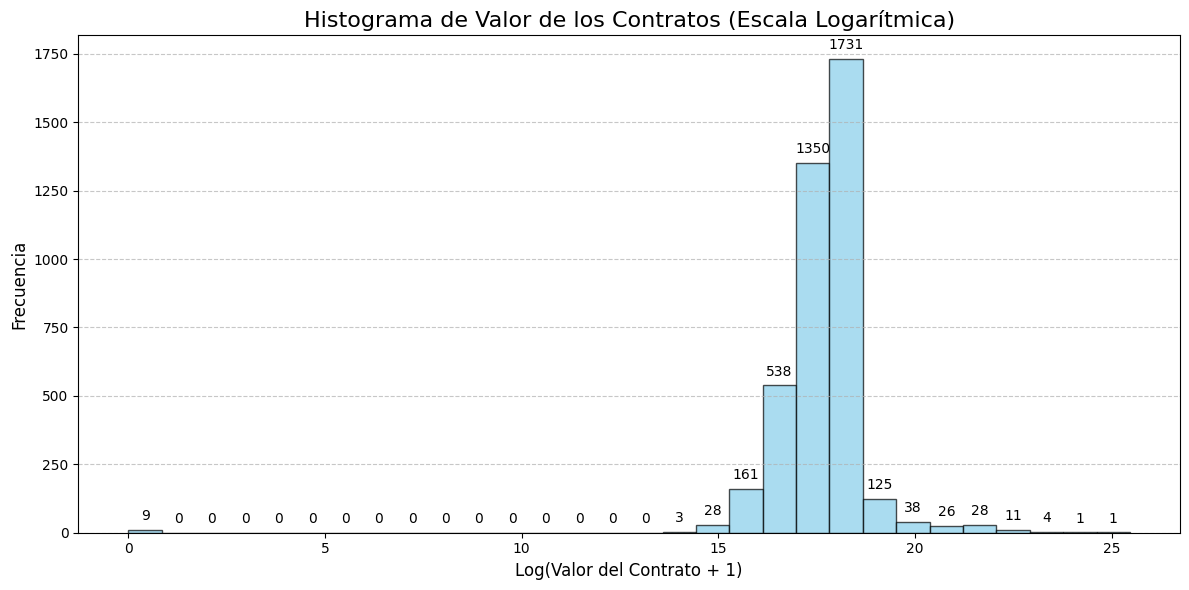

In [19]:

plt.figure(figsize=(12, 6))

# Histograma de Valor de los Contratos en escala logarítmica
plt.hist((Base_filtrada['log_valor_contrato']), bins=30, color='skyblue', edgecolor='black', alpha=0.7)

# Etiquetas y título
plt.title('Histograma de Valor de los Contratos (Escala Logarítmica)', fontsize=16)
plt.xlabel('Log(Valor del Contrato + 1)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)

# Etiquetas sobre las barras
for p in plt.gca().patches:
    plt.gca().annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

Al observar el histograma después de aplicar la transformación logarítmica a la variable 'valor_del_contrato', se nota una notable aproximación a una distribución normal. Esta transformación logarítmica ha logrado mitigar la presencia de valores extremos, permitiendo que la distribución de los datos se asemeje más a una campana simétrica típica de una distribución normal. Este patrón es respaldado por los estadísticos descriptivos obtenidos.

Adicionalmente es importante resaltar la existencia de datos atípicos, estos estan distorsionando los datos dificultados su análisis, a la vez que muestran la gran diferencia en el valor de los contratos.

Con el fin de ver la relación de las variables anteriores con el valor del contrato se hará un análisis estadístico para poder comprar de manera visual los datos, después de analizar visualmente se presentará el análisis ANOVA para poder concluir si existe diferencia entre las medias de las distintas categorías de las variables categóricas 

In [20]:
estadisticas_estado_contrato = Base_filtrada.groupby('estado_contrato')['valor_del_contrato'].describe()
print(estadisticas_estado_contrato)

                  count          mean           std         min         25%  \
estado_contrato                                                               
Activo            146.0  6.374116e+07  2.399270e+07  16470000.0  45100000.0   
Cerrado           151.0  7.403442e+07  1.164830e+08   4420000.0  34765500.0   
En ejecución     1897.0  1.224159e+08  1.060557e+09         0.0  26438040.0   
Modificado       1546.0  2.167650e+08  3.003941e+09         0.0  31200000.0   
cedido             37.0  7.061784e+07  3.293872e+07  14850000.0  46400000.0   
terminado         277.0  9.800046e+07  3.062851e+08   1000000.0  30286667.0   

                        50%         75%           max  
estado_contrato                                        
Activo           60500000.0  79200000.0  1.320000e+08  
Cerrado          56600803.0  80892000.0  1.282576e+09  
En ejecución     52000000.0  82166667.0  3.750255e+10  
Modificado       55000000.0  78631357.5  1.146352e+11  
cedido           58483333.0  88

In [21]:
anova_estado_contrato = f_oneway(*[Base_filtrada[Base_filtrada['estado_contrato'] == categoria]['valor_del_contrato'] for categoria in Base_filtrada['estado_contrato'].unique()])
print(anova_estado_contrato)

F_onewayResult(statistic=0.5657609009135229, pvalue=0.7263495261902979)


 No hay evidencia significativa para concluir que hay diferencias en los valores del contrato entre las categorías de estado de contrato

In [22]:
estadisticas_justificacion_modalidad_de = Base_filtrada.groupby('justificacion_modalidad_de')['valor_del_contrato'].describe()
print(estadisticas_justificacion_modalidad_de)

                                                     count          mean  \
justificacion_modalidad_de                                                 
Contratos de bienes y servicios sujetos a reserva      1.0  6.702828e+07   
Contratos o convenios Interadministrativos (con...     1.0  5.090000e+08   
Contratos o convenios Interadministrativos (val...   100.0  1.249712e+09   
Contratos para el desarrollo de actividades cie...     1.0  2.960000e+08   
Decreto 092 de 2017                                    5.0  1.922349e+09   
Ejecución de trabajos artísticos                       1.0  7.741805e+08   
Ley 1150 de 2007                                       9.0  2.191042e+09   
No Definido                                           11.0  8.443664e+07   
No existe pluralidad de oferentes en el mercado       26.0  1.414662e+08   
Prestación de servicios de salud                       4.0  7.438798e+07   
Presupuesto inferior al 10% de la menor cuantía       46.0  1.781905e+07   
Presupuesto 

In [23]:
anova_justificacion_modalidad_de = f_oneway(*[Base_filtrada[Base_filtrada['justificacion_modalidad_de'] == categoria]['valor_del_contrato'] for categoria in Base_filtrada['justificacion_modalidad_de'].unique()])
print(anova_justificacion_modalidad_de)

F_onewayResult(statistic=79.63645467136082, pvalue=4.3135113273753625e-226)


Dado que el valor p es muy pequeño, se puede concluir que hay diferencias significativas entre las medias de los valores del contrato para las diferentes categorías de 'justificacion_modalidad_de'. 

In [24]:
estadisticas_tipodocproveedor = Base_filtrada.groupby('tipodocproveedor')['valor_del_contrato'].describe()
print(estadisticas_tipodocproveedor)

                        count          mean           std         min  \
tipodocproveedor                                                        
Cédula de Ciudadanía   3771.0  5.597821e+07  3.210541e+07   1000000.0   
Cédula de Extranjería     6.0  3.751356e+07  2.831082e+07   7245000.0   
No Definido             266.0  1.477052e+09  7.661747e+09         0.0   
Sin Descripcion           9.0  1.470113e+09  2.118102e+09  14500000.0   
Tarjeta de Identidad      2.0  7.020000e+07  7.184206e+07  19400000.0   

                               25%          50%           75%           max  
tipodocproveedor                                                             
Cédula de Ciudadanía   30000000.00   52767000.0  7.773600e+07  1.828823e+08  
Cédula de Extranjería  16236249.75   31921500.0  5.696700e+07  7.767000e+07  
No Definido            29277500.00  152988499.0  7.179602e+08  1.146352e+11  
Sin Descripcion        79100000.00  393716720.0  1.571191e+09  5.262774e+09  
Tarjeta de Identidad

In [25]:
anova_tipodocproveedor = f_oneway(*[Base_filtrada[Base_filtrada['tipodocproveedor'] == categoria]['valor_del_contrato'] for categoria in Base_filtrada['tipodocproveedor'].unique()])
print(anova_tipodocproveedor)

F_onewayResult(statistic=33.590227583234466, pvalue=1.3098725284848128e-27)


Dado que el valor p es muy pequeño, se puede concluir que hay diferencias significativas entre las medias de los valores del contrato para las diferentes categorías de 'tipodocproveedor'.

In [26]:
estadisticas_proveedor_adjudicado = Base_filtrada.groupby('proveedor_adjudicado')['valor_del_contrato'].describe()
print(estadisticas_proveedor_adjudicado)

                                   count          mean           std  \
proveedor_adjudicado                                                   
1022395551                           3.0  4.733567e+07  1.346807e+07   
1031161821                           2.0  3.554933e+07  1.248279e+06   
4ESAS                                1.0  2.250000e+09           NaN   
899999061-9                          1.0  2.100000e+07           NaN   
94151597                             1.0  1.280000e+07           NaN   
...                                  ...           ...           ...   
Álvaro Iván Revelo Méndez            1.0  5.600000e+07           NaN   
Ángela Liliana Rodríguez González    4.0  5.771285e+07  1.094605e+07   
Ángela María Amaya Arias             1.0  5.760000e+07           NaN   
Ángela María Bedoya Blandón          4.0  7.274408e+07  8.560425e+06   
Óscar David Petro Díaz               2.0  4.081678e+07  4.343782e+07   

                                            min           25%  

In [27]:
anova_proveedor_adjudicado = f_oneway(*[Base_filtrada[Base_filtrada['proveedor_adjudicado'] == categoria]['valor_del_contrato'] for categoria in Base_filtrada['proveedor_adjudicado'].unique()])
print(anova_proveedor_adjudicado)

F_onewayResult(statistic=0.45341551473936237, pvalue=0.9999999999999999)


Dado que el valor p es muy cercano a 1, no hay evidencia significativa para afirmar que hay diferencias significativas entre las medias de los valores del contrato para las diferentes categorías de 'proveedor_adjudicado'.

In [28]:
estadisticas_es_grupo = Base_filtrada.groupby('es_grupo')['valor_del_contrato'].describe()
print(estadisticas_es_grupo)

           count          mean           std          min          25%  \
es_grupo                                                                 
No        4047.0  1.507616e+08  1.994869e+09          0.0   29911937.5   
Si           7.0  1.064874e+09  1.043496e+09  390091802.0  457263210.5   

                  50%           75%           max  
es_grupo                                           
No         53728920.0  8.059338e+07  1.146352e+11  
Si        632764166.0  1.135595e+09  3.245542e+09  


In [29]:
anova_es_grupo = f_oneway(*[Base_filtrada[Base_filtrada['es_grupo'] == categoria]['valor_del_contrato'] for categoria in Base_filtrada['es_grupo'].unique()])
print(anova_es_grupo)

F_onewayResult(statistic=1.4688750092733471, pvalue=0.22559394190173032)


Dado que el valor p es mayor que 0.05, no hay evidencia significativa para afirmar que hay diferencias significativas entre las medias de los valores del contrato para las diferentes categorías de 'es_grupo'.

In [30]:
estadisticas_es_pyme = Base_filtrada.groupby('es_pyme')['valor_del_contrato'].describe()
print(estadisticas_es_pyme)

          count          mean           std       min         25%         50%  \
es_pyme                                                                         
No       3814.0  1.509970e+08  2.051522e+09       0.0  30000000.0  53580600.0   
Si        240.0  1.736817e+08  5.230494e+08  963900.0  24214506.0  58670400.0   

                 75%           max  
es_pyme                             
No       80441366.75  1.146352e+11  
Si       87462281.25  3.900000e+09  


In [31]:
anova_es_pyme = f_oneway(*[Base_filtrada[Base_filtrada['es_pyme'] == categoria]['valor_del_contrato'] for categoria in Base_filtrada['es_pyme'].unique()])
print(anova_es_pyme)

F_onewayResult(statistic=0.029218669186609796, pvalue=0.8642836519632708)


Dado que el valor p es mayor que 0.05, no hay evidencia significativa para afirmar que hay diferencias significativas entre las medias de los valores del contrato para las diferentes categorías de 'es_pyme'.

Las conclusiones indican que no hay diferencias significativas en las medias de los valores del contrato para las categorías de 'justificacion_modalidad_de' y 'tipodocproveedor'. 
En las demás variables se evidencia que si hay una diferencia significativa entre las subcategorías de las variables y el valor del contrato.

Basado en lo anterior se interpreta que la detección de diferencias de medias en las categorías de la base de datos puede ser indicativa de variaciones en la asignación de recursos y contratos. Esto podría tener implicaciones importantes para la transparencia, ya que se podrían identificar patrones que sugieran posibles sesgos o irregularidades en la distribución de contratos.

Por otra parte, como oportunidad de mejora al existir esta diferencia el ministerio puede apuntar a áreas específicas de la gestión de recursos que podrían ser más eficientes o requerir mejoras. Esto permitiría al ministerio focalizar sus esfuerzos en optimizar los procesos y asignar recursos de manera más efectiva. Ademas, al identificar patrones en la asignación de contratos podrian señalar áreas de mejora que no se alinean con los objetivos ambientales.

In [32]:
columnas_interes = ['valor_del_contrato', 'estado_contrato', 'justificacion_modalidad_de', 'tipodocproveedor', 'es_grupo', 'es_pyme']
datos_interes = Base_filtrada[columnas_interes]

# Convierte dummy
datos_interes = pd.get_dummies(datos_interes, columns=['estado_contrato', 'justificacion_modalidad_de', 'tipodocproveedor', 'es_grupo', 'es_pyme'], drop_first=True)

# Calcula la matriz de correlación
matriz_correlacion = datos_interes.corr()

#correlacion respecto al valor del contrato 
correlacion = matriz_correlacion['valor_del_contrato']

print(correlacion)

valor_del_contrato                                                                                                       1.000000
estado_contrato_Cerrado                                                                                                 -0.007726
estado_contrato_En ejecución                                                                                            -0.014076
estado_contrato_Modificado                                                                                               0.025371
estado_contrato_cedido                                                                                                  -0.003934
estado_contrato_terminado                                                                                               -0.007381
justificacion_modalidad_de_Contratos o convenios Interadministrativos (con valor)                                        0.002810
justificacion_modalidad_de_Contratos o convenios Interadministrativos (valor cero)        

En resumen, en base a las correlaciones calculadas, el estado del contrato, el tipo de documento del proveedor, Es Grupo y Es PYME no están fuertemente relacionadas con el valor del contrato. Sin embargo, respecto a la justificaciones de modalidad la variable reglas específicas presenta una correlacion lijera con el valor del contrato.

 Esto podría indicar que otros factores no contemplados en el análisis actual podrían estar influyendo significativamente en los montos de los contratos. Por lo que puede haber aspectos específicos de la contratación pública que aún no se hayan explorado y que podrían estar afectando los resultados. Sin emabargo, por el tipo de ministerio se interpreta que mantiene procesos de adquisición flexibles y adaptables, la variabilidad en los valores de contrato podría estar relacionada con la capacidad de ajustar las estrategias de contratación según las necesidades específicas de cada caso, siendo concientes de los cambios en el ámbito ambiental y en el desarrollo sostenible.




La ausencia de una correlación aparente entre las variables, pero la presencia de diferencias significativas en las medias entre grupos según las pruebas de ANOVA, sugiere una dinámica interesante en la relación entre las variables en el contexto de la contratación pública del Ministerio de Ambiente y Desarrollo Sostenible de Colombia.

La falta de correlación lineal directa puede indicar que la relación entre las variables no sigue un patrón simple y directo. Es decir, no se puede predecir el valor de una variable a partir de la otra utilizando una relación lineal. Sin embargo, la existencia de diferencias sistemáticas en las medias entre grupos indica que, a pesar de la falta de relación lineal, aún hay patrones distintivos asociados a las categorías de las variables analizadas.

## Conclusiones



Considerando el análisis detallado de la base de datos de contratación pública del Ministerio de Ambiente y Desarrollo Sostenible entre los años 2020 y 2023, se observa una serie de patrones y tendencias que proporcionan una perspectiva rica sobre las prácticas contractuales durante este período.

En primer lugar, la preeminencia de la "Contratación directa" destaca como una estrategia eficaz en la gestión de recursos y tiempos, sugiriendo una optimización en la ejecución de proyectos. Este enfoque puede indicar la capacidad del Ministerio para tomar decisiones ágiles y directas en la contratación, lo que resulta fundamental para la eficiencia en la implementación de sus iniciativas.

La frecuencia destacada de la categoría "Prestación de servicios" resalta su importancia central en las actividades ministeriales. Este énfasis puede sugerir la externalización de funciones especializadas, lo que podría derivarse de la necesidad de acceso a conocimientos especializados o recursos específicos para alcanzar los objetivos del Ministerio.

Al explorar las justificaciones asociadas a las modalidades de contratación, se identifica una preferencia por servicios profesionales y acuerdos interadministrativos. Esta elección estratégica proporciona una visión más detallada de las necesidades específicas del Ministerio y cómo busca satisfacerlas mediante la colaboración con proveedores externos, posiblemente para obtener experiencia técnica o recursos especializados.

La variabilidad temporal en la cantidad de contratos revela adaptaciones a condiciones económicas y de salud pública a lo largo del tiempo. Esta flexibilidad destaca la capacidad del Ministerio para ajustar sus estrategias de contratación en respuesta a circunstancias cambiantes, enfatizando la importancia de considerar el contexto temporal al interpretar los patrones contractuales.

En términos de duración de los contratos, la preferencia por acuerdos de mediano a largo plazo sugiere una visión estratégica que busca estabilidad y compromiso continuo con los proveedores. La identificación de diversos proveedores, tanto del propio Ministerio como de entidades especializadas, revela una red de relaciones que contribuye a la implementación exitosa de proyectos, enfatizando la importancia de establecer colaboraciones sólidas.

El análisis de las condiciones de "es_grupo" y "es_pyme" destaca la predominancia de entidades individuales no consideradas grupos y una representación limitada de pequeñas y medianas empresas en la adjudicación de contratos. Estos hallazgos indican posibles desafíos para la participación de empresas más pequeñas en las oportunidades de contratación pública y subrayan áreas potenciales para la promoción de la inclusión de este sector en futuros procesos de contratación. En este sentido, podría ser beneficioso explorar estrategias para fomentar la participación de PYMEs, contribuyendo así a una mayor diversidad y competencia en los procesos de contratación del Ministerio.

El enfoque integral adoptado en el análisis destaca la necesidad de una exploración más profunda de las diferencias sistemáticas entre grupos. La consideración de posibles relaciones no lineales entre las variables, interacciones complejas y la posible influencia de variables no contempladas es esencial para comprender la complejidad de los patrones contractuales identificados.

Estos hallazgos no solo proporcionan una visión más completa de las prácticas contractuales del Ministerio, sino que también establecen una base sólida para la mejora continua. La optimización de la gestión de recursos y la toma de decisiones estratégicas pueden beneficiarse de un entendimiento más preciso de los factores que contribuyen a las diferencias sistemáticas en los valores de contrato. Al abordar estas complejidades, el Ministerio puede fortalecer sus prácticas contractuales, adaptándolas de manera más efectiva a las demandas cambiantes y a los objetivos específicos de la cartera ministerial en el ámbito del ambiente y desarrollo sostenible.